ERROR: Could not find a version that satisfies the requirement tensorflow-gpu (from versions: none)
ERROR: No matching distribution found for tensorflow-gpu


In [6]:
#-------- Linear Regression --------
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([10, 20, 28, 30, 45, 38, 42, 55, 55]).reshape((-1, 1))
Y = np.array([1.5, 2.1, 3.2, 4.2, 5, 6, 7, 8, 9]) 
print (X)
print (Y)
model = LinearRegression().fit(X, Y)

x_new = np.array([100]).reshape((-1, 1))
print(x_new)
                                 
y_new = model.predict(x_new)
print(y_new)


[[10]
 [20]
 [28]
 [30]
 [45]
 [38]
 [42]
 [55]
 [55]]
[1.5 2.1 3.2 4.2 5.  6.  7.  8.  9. ]
[[100]]
[15.49639682]


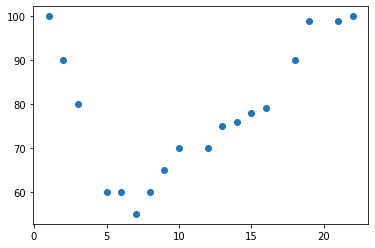

[-3.03208795e-02  1.34333191e+00 -1.55383039e+01  1.13768037e+02]


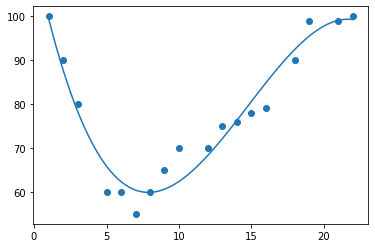

In [7]:
# ------- Polynomial Regression ---------
# source: https://www.w3schools.com/python/python_ml_polynomial_regression.asp
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()
#-------
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3)) # TODO: change "degree parameter" 3 to 8 and see the result of new regression line
# print model coefficients 
print(mymodel.coefficients)

myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()


In [8]:
#--------- F-value ---------------
import numpy as np
import scipy 

x = [18, 19, 22, 25, 27, 28, 41, 45, 51, 55]
y = [14, 15, 15, 17, 18, 22, 25, 25, 27, 34]
#define F-test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1 - scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

#perform F-test
f_test(x, y)

# The F test statistic is 4.38712 and the corresponding p-value is 0.019127

(4.387122002085505, 0.01912653593238578)

In [9]:
# -------- R^2, MSE and RSME Errors -------

from sklearn.metrics import mean_squared_error
import numpy as np   
# Given values
Y_true = [1,4,5,6,7]  # Y_true = Y (original values)
  
# calculated values
Y_pred = [0.6,3,4,5.1,5.9]  # Y_pred = Y
  

print ('MSE:' ,mean_squared_error(Y_true,Y_pred))
rmse = np.sqrt(mean_squared_error(Y_true,Y_pred)) 
print ('RSME: ',rmse)
print ('R^2: ',r2_score(Y_true, Y_pred))


MSE: 0.836
RSME:  0.9143303560529968


NameError: name 'r2_score' is not defined

In [1]:
# -------- R^2, MSE Errors with Scikit Learn-------
# Source: https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
#
# Load the Sklearn Boston Dataset
#
boston_ds = datasets.load_boston()
X = boston_ds.data
y = boston_ds.target

# Create a training and test split, 70% train, 30% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a pipeline using Training dataset and related labels
# The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. 
pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train, y_train)

# Calculate the predicted value for training and test dataset
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))

# R-Squared
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
                r2_score(y_test, y_test_pred)))

MSE train: 22.545, test: 21.517
R^2 train: 0.743, test: 0.711


In [12]:
#--------- Logistic Regression Classification Sample -----------------
# Source: https://datatofish.com/logistic-regression-python/
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])


X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)  #in this case, you may choose to set the test_size=0. You should get the same prediction here

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)



new_candidates = {'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }

df2 = pd.DataFrame(new_candidates,columns= ['gmat', 'gpa','work_experience'])
y_pred=logistic_regression.predict(df2)

print (df2)
print ("who will get admitted:")
print (y_pred)

   gmat  gpa  work_experience
0   590  2.0                3
1   740  3.7                4
2   680  3.3                6
3   610  2.3                1
4   710  3.0                5
who will get admitted:
[0 1 1 0 1]
